In [1]:
"""
本程序用于演示激光雷达的  .pcd.bin文件的解析与了解
"""

import numpy as np
import cv2  
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def opencv2matandshow(img):
    b, g, r = cv2.split(img)
    img_cvt = cv2.merge((r, g, b))
    plt.imshow(img_cvt)

In [3]:
# 0. 首先，数据来源是nuscenes数据集 v1.0-mini数据集内的 sweeps/LIDAR_TOP其中一个激光雷达数据
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)
# print(pc.shape) # (173760,)

In [4]:
# 1. 了解数据结构，数据由5个部分组成
    # Data is stored as (x, y, z, intensity, ring index).
    # x y z 就是基于激光雷达的3d坐标系
    # intensity 反射强度，指的是，激光接收器接受的 激光的反射次数
    # ring index  第几条线，激光有32线， 他就是1-32的数字。 课程中不用
    # 所以改变下形状输出
#                                       x             y             z      intensity    ring index
# print(pc.reshape(-1, 5)[0])     # [-2.942755    -0.59551746  -1.7575045      20.         0.        ]
# print(pc.reshape(-1, 5)[10])    # [-4.5377426   -0.5805964   -1.4302253      36.         10.       ]

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是
x, y, z, intensity = pc.T # 解包方法
x.shape, y.shape


((34752,), (34752,))

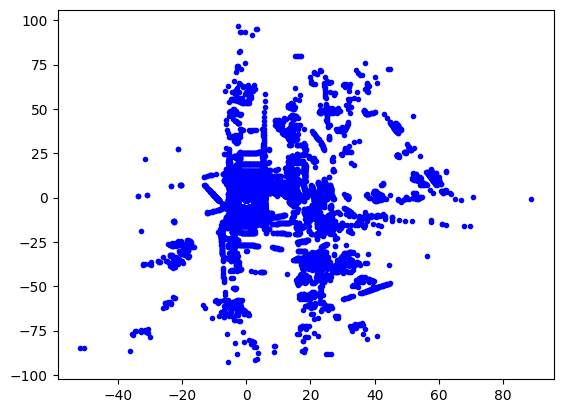

np.max(x) 	 88.75836181640625
np.min(x) 	 -51.632450103759766
np.max(y) 	 96.5278549194336
np.min(y) 	 -92.97260284423828
np.max(z) 	 14.154901504516602
np.min(z) 	 -3.679185152053833
np.max(intensity) 	 244.0
np.min(intensity) 	 0.0


In [5]:
# 2. 可视化 先不考虑z
# matplotlib可视化， 效果不理想。
plt.plot(x, y, "b.")
plt.show()
## 2.1 看结果注意 主要注意取值范围
print(f"np.max(x) \t {np.max(x)}")
print(f"np.min(x) \t {np.min(x)}")
print(f"np.max(y) \t {np.max(y)}")
print(f"np.min(y) \t {np.min(y)}")
print(f"np.max(z) \t {np.max(z)}")
print(f"np.min(z) \t {np.min(z)}")
print(f"np.max(intensity) \t {np.max(intensity)}")
print(f"np.min(intensity) \t {np.min(intensity)}")

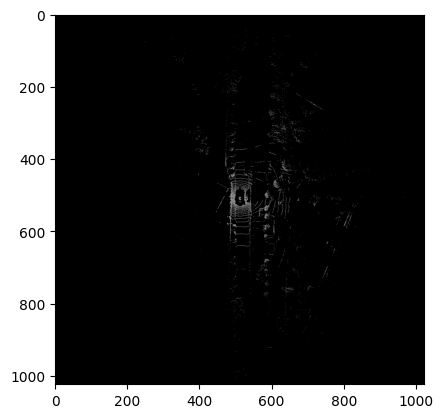

In [6]:
# 3. 可视化 考虑z，得到
# opencv可视化

# 设置图像的尺寸1024*1024
image_size = 1024

# 数据归一化
pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
x1 = x / pc_range # 图像归一化到 -1 到 1
y1 = y / pc_range

# 数据放大到1024的尺度。
half_image_size = image_size / 2
x1 = x1 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
y1 = y1 * half_image_size + half_image_size 

# opencv的图像是可以用numpy创建的
image = np.zeros((image_size, image_size, 3), np.uint8)

for ix, iy, iintensity in zip(x1, y1, intensity):
    ix = int(ix)
    iy = int(iy)
    
    iintensity = iintensity / 255.0 * 128 + 127 # 重点：iintensity取值范围值0 - 255。
    # 这里主要是为了让iintensity以127为起点。iintensity越大 计算后的 iintensity更接近255
    
    # iz的取值范围  -17 到 13 (这个是杜老师视频里的范围。我这个例子里可能不是这样) 
    
    # 判断是否在图像范围内
    if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
        image[iy, ix] = iintensity, iintensity, iintensity
        
cv2.imwrite("my-pc-with-intensity.jpg", image) # 会输出图片
opencv2matandshow(image) # 为了方便也提供了直接在jupyter中显示的函数
# cv2.imshow("111", image)
# cv2.waitKey(0)
# cv2.destoryAllWindows()

In [7]:
"""
此图格子代码, 演示了intensity逐渐增加的小动画。会输出output.avi
暂无实际意义
"""

# # 设置图像的尺寸1024*1024
# image_size = 1024

# # 数据归一化
# pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
# x2 = x / pc_range # 图像归一化到 -1 到 1
# y2 = y / pc_range
# z2 = z

# # 数据放大到1024的尺度。
# half_image_size = image_size / 2
# x2 = x2 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
# y2 = y2 * half_image_size + half_image_size 

# # opencv的图像是可以用numpy创建的
# image = np.zeros((image_size, image_size, 3), np.uint8)

# # 
# # 输出avi
# fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
# out = cv2.VideoWriter("output.avi", fourcc, 30, (image_size, image_size))

# pbar = tqdm(range(0, 127), desc="11")
# for base in pbar:
#     for ix, iy, iz, iintensity in zip(x2, y2, z2, intensity):
#         ix = int(ix)
#         iy = int(iy)

#         iintensity = iintensity / 255.0 * 128 + base # intensity
#         # 判断是否在图像范围内
#         if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
#             image[iy, ix] = iintensity, iintensity, iintensity
        
#     out.write(image)        
#     # cv2.imshow("frame", image)
#     opencv2matandshow(image)
#     pbar.desc = f"{base}"
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# out.release()
# # cv2.destroyAllWindows()

'\n此图格子代码, 演示了intensity逐渐增加的小动画。会输出output.avi\n暂无实际意义\n'

In [8]:
"""
本程序用于演示z逐渐增强的动画
暂无实际意义
"""

# # 设置图像的尺寸1024*1024
# image_size = 1024

# # 数据归一化
# pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
# x3 = x / pc_range # 图像归一化到 -1 到 1
# y3 = y / pc_range
# z3 = z

# # 数据放大到1024的尺度。
# half_image_size = image_size / 2
# x3 = x3 * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
# y3 = y3 * half_image_size + half_image_size 

# # opencv的图像是可以用numpy创建的
# image = np.zeros((image_size, image_size, 3), np.uint8)

# # 输出avi
# fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
# out = cv2.VideoWriter("iz-change.avi", fourcc, 30, (image_size, image_size))

# pbar = tqdm(range(0, 127), desc="11")
# for base in pbar:
#     for ix, iy, iz, iintensity in zip(x3, y3, z3, intensity):
#         ix = int(ix)
#         iy = int(iy)

#         alpha = min(1, max(0, (iz) / 5)) # iz是高度，单位以米为单位 
#         color = 128 * alpha + base
        
#         # 判断是否在图像范围内
#         if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
#             image[iy, ix] = color, color, color
        
#     out.write(image)        
#     # cv2.imshow("frame", image)
#     pbar.desc = f"{base}"
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# out.release()
# # cv2.destroyAllWindows()

'\n本程序用于演示z逐渐增强的动画\n暂无实际意义\n'

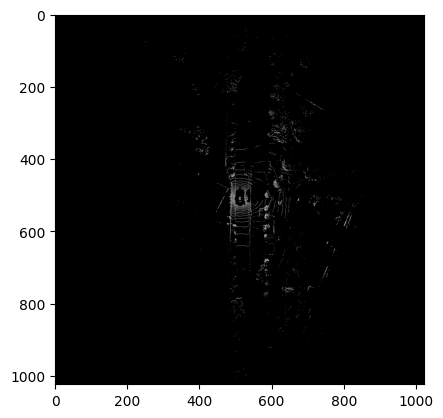

In [7]:
"""
正常的z的处理
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


# 0. 首先，数据来源是v1.0-mini数据集内的 sweeps/LIDAR_TOP
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是
x, y, z, intensity = pc.T # 解包方法
x.shape, y.shape

# opencv可视化

# 设置图像的尺寸1024*1024
image_size = 1024

# 数据归一化
pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
x = x / pc_range # 图像归一化到 -1 到 1
y = y / pc_range

# 数据放大到1024的尺度。
half_image_size = image_size / 2
x = x * half_image_size + half_image_size # 因为x有正有负且在-1到1之间。所以这样放大。
y = y * half_image_size + half_image_size 

# opencv的图像是可以用numpy创建的
image = np.zeros((image_size, image_size, 3), np.uint8)

for ix, iy, iz, iintensity in zip(x, y, z, intensity):
    ix = int(ix)
    iy = int(iy)

    alpha = min(1, max(0, (iz) / 5)) # iz是高度，单位以米为单位
    # 视频中iz取值范围 -17 到  13  
    color = 128 * alpha + 127

    # 判断是否在图像范围内
    if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
        image[iy, ix] = color, color, color
cv2.imwrite("res.jpg", image)  
opencv2matandshow(image)

In [2]:
"""
本程序用于演示z逐渐  增高 的动画
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


# 0. 首先，数据来源是v1.0-mini数据集内的 sweeps/LIDAR_TOP
file = "../../data/n015-2018-10-02-10-50-40+0800__LIDAR_TOP__1538448760497849.pcd.bin"
pc = np.frombuffer(open(file, "rb").read(), dtype=np.float32)

pc = pc.reshape(-1, 5)[:, :4] # ring index 不用体现在代码中就是

# # # 输出avi
image_size = 1024
fourcc = cv2.VideoWriter_fourcc(*'XVID') # VideoWriter中需要的参数
out = cv2.VideoWriter("z-change.avi", fourcc, 30, (image_size, image_size))

z1 = np.linspace(-3, 5, 500)
pbar = tqdm(z1, desc="11")
image_list = []
index = 0
for z in pbar:
    index += 1
    xy_coor = []
    pbar.desc = f"{z}"
    indices = np.argwhere(pc[:, 2] < z)
    res_point = pc[indices]
    res_point = np.squeeze(res_point)
    x, y, z, intensity = res_point.T # 解包方法

    pc_range = 100 # 取100主要是上方数据均在  -100 - 100 之间
    x = x / pc_range # 图像归一化到 -1 到 1
    y = y / pc_range

    half_image_size = image_size / 2
    x = x * half_image_size + half_image_size 
    y = y * half_image_size + half_image_size 

    image = np.zeros((image_size, image_size, 3), np.uint8)
    
    for ix, iy, iz, iintensity in zip(x, y, z, intensity):
        ix = int(ix)
        iy = int(iy)
        
        iintensity = iintensity / 255.0 * 128 + 127 # 重点：iintensity取值范围值0 - 255。

        if ix > 0 and ix < image_size and iy > 0 and iy < image_size:
            image[iy, ix] = iintensity, iintensity, iintensity      
    out.write(image)  
    cv2.imwrite(f"img/image{index}.jpg", image)   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

out.release()

-2.9519038076152304:   1%|          | 4/500 [00:00<00:13, 35.91it/s]

5.0: 100%|██████████| 500/500 [00:59<00:00,  8.40it/s]                  


In [5]:
import imageio
import os
def compose_gif():
    root = r"/datav/shouxieai/bevfusion_02hero/workspace/01study_LIDAR_DATA_FILE/img"
    img_paths = os.listdir(r"/datav/shouxieai/bevfusion_02hero/workspace/01study_LIDAR_DATA_FILE/img")
    gif_images = []
    for path in img_paths:
        path = os.path.join(root, path)
        gif_images.append(imageio.imread(path))
    imageio.mimsave("test.gif",gif_images)

compose_gif()

/tmp/ipykernel_894303/2426979321.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_images.append(imageio.imread(path))


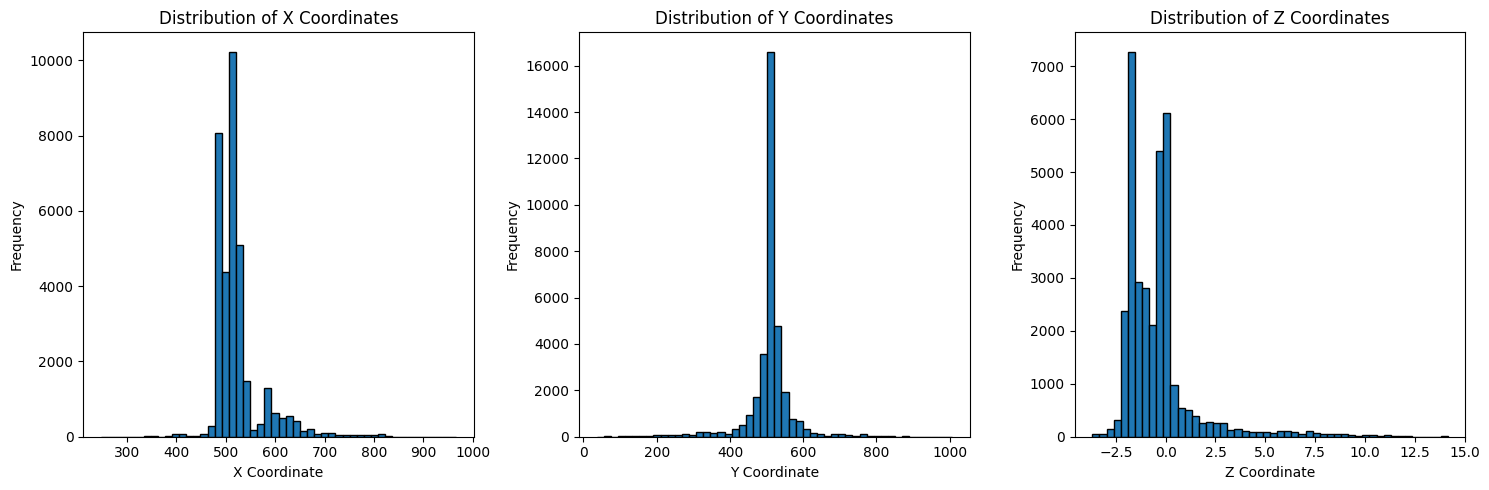

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 获取每个坐标轴的数据
x_coords = x
y_coords = y
z_coords = z

# 创建一个包含 1 行 3 列的子图布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 绘制 x 坐标的直方图
axs[0].hist(x_coords, bins=50, edgecolor='black')
axs[0].set_xlabel('X Coordinate')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of X Coordinates')

# 绘制 y 坐标的直方图
axs[1].hist(y_coords, bins=50, edgecolor='black')
axs[1].set_xlabel('Y Coordinate')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Y Coordinates')

# 绘制 z 坐标的直方图
axs[2].hist(z_coords, bins=50, edgecolor='black')
axs[2].set_xlabel('Z Coordinate')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Distribution of Z Coordinates')

# 调整子图之间的间距
plt.tight_layout()
plt.show()
